In [15]:
from pathlib import Path
from dataclasses import dataclass
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from typing import Any
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
%load_ext autoreload
%autoreload 2


@dataclass
class Config:
    REPO_ROOT: Path = Path("../../")
    data_dir: Path = REPO_ROOT / "data"


config = Config()

sys.path.append(str(config.REPO_ROOT))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from python.src.utils import IndividualConditionalExpectation

In [17]:
from python.src.preprocess import (
    preprocess_rfcc,
)

df_rfcc = pd.read_csv(config.data_dir / "risk_factors_cervical_cancer.csv")
df_rfcc_preprocessed = preprocess_rfcc(df=df_rfcc)
assert df_rfcc.shape[0] == df_rfcc_preprocessed.shape[0]

In [116]:
X = df_rfcc_preprocessed.drop("Biopsy", axis=1)
y = df_rfcc_preprocessed["Biopsy"].map(
    {"Healthy": 0, "Cancer": 1}
)  # Replace with your actual target
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=43
# )
df_rfcc_preprocessed_sampled = df_rfcc_preprocessed.sample(n=300, random_state=42)
df_rfcc_preprocessed_sampled_X = df_rfcc_preprocessed_sampled.drop("Biopsy", axis=1)
rf_model = RandomForestClassifier(random_state=43)  # random_stateで再現性を確保
rf_model.fit(X, y)


RandomForestClassifier(random_state=43)

In [118]:
ice = IndividualConditionalExpectation(
    model=rf_model,
    X=df_rfcc_preprocessed_sampled_X,
    var_names=["Age"],
    pred_type="classification",
)

# sampleで取得したインデックスをそのまま使用
ice.individual_conditional_expectation(
    var_name="Age",
    ids_to_compute=[i for i in range(df_rfcc_preprocessed_sampled_X.shape[0])],
    n_grid=50,
)  # 例として5つのインスタンスを選択
# ice.plot()

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/python/notebook/../../python/src/utils.py:169: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


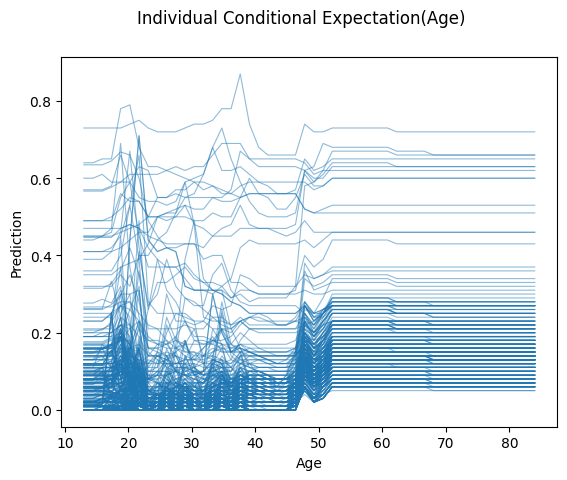

In [119]:
ice.plot()

In [96]:
from python.src.preprocess import (
    preprocess_bike_data,
)

df_bike = pd.read_csv(config.data_dir / "bike+sharing+dataset" / "day.csv")
df_bike_processed = preprocess_bike_data(df=df_bike)
assert df_bike.shape[0] == df_bike_processed.shape[0]


In [200]:
# 必要な特徴量を選択
features_of_interest = [
    "days_since_2011",
    "temp",
    "season",
    "windspeed",
    "hum",
]  # Rのコードに合わせる
# X = df_bike_processed[features_of_interest]
# y = df_bike_processed["cnt"]
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# カテゴリ変数と数値変数を分離
categorical_features = ["season"]
numerical_features = ["days_since_2011", "temp", "windspeed", "hum"]
# OneHotEncoderを適用
encoded_features = enc.fit_transform(df_bike_processed[categorical_features])
encoded_df = pd.DataFrame(
    encoded_features, columns=enc.get_feature_names_out(categorical_features)
)

# 数値変数と結合
X = pd.concat([df_bike_processed[numerical_features], encoded_df], axis=1)
y = df_bike_processed["cnt"]

X_sampled = X.sample(n=300, random_state=42)
# 決定木の構築
ct = RandomForestRegressor(random_state=42)
ct.fit(X, y)

RandomForestRegressor(random_state=42)

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/python/notebook/../../python/src/utils.py:200: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


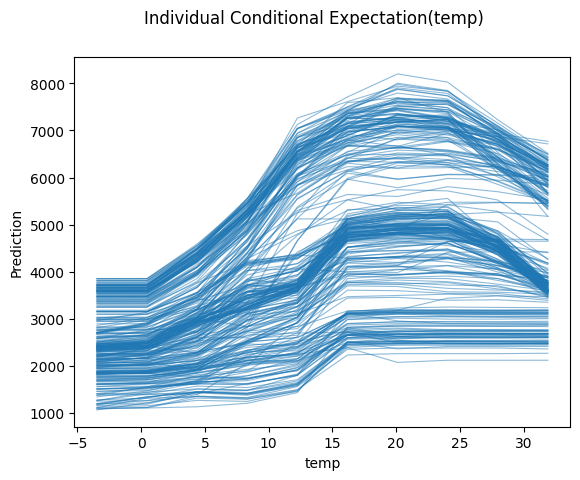

In [203]:
ice = IndividualConditionalExpectation(
    model=ct,
    X=X_sampled,
    var_names=["temp", "hum", "windspeed"],
    pred_type="regression",
)

# sampleで取得したインデックスをそのまま使用
ice.individual_conditional_expectation(
    var_name="temp",
    ids_to_compute=[i for i in range(X_sampled.shape[0])],
    n_grid=10,
)  # 例として5つのインスタンスを選択
ice.plot()

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/python/notebook/../../python/src/utils.py:257: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


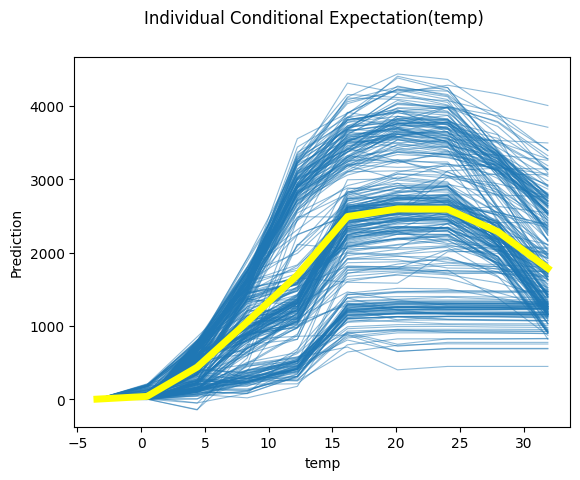

In [205]:
# sampleで取得したインデックスをそのまま使用
ice.individual_conditional_expectation(
    var_name="temp",
    ids_to_compute=[i for i in range(X_sampled.shape[0])],
    n_grid=10,
)  # 例として5つのインスタンスを選択
ice.plot_cice()

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/python/notebook/../../python/src/utils.py:188: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


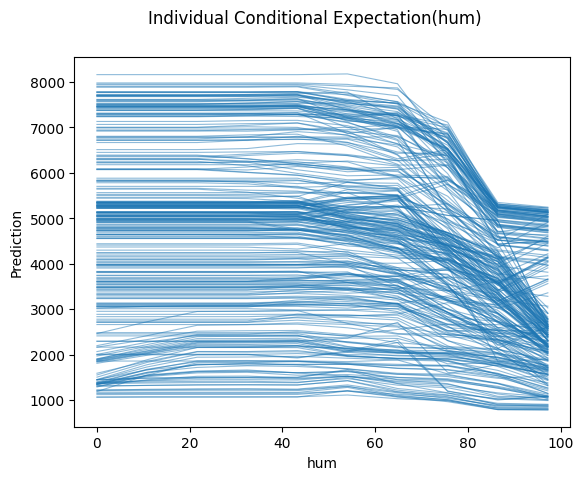

In [188]:
# sampleで取得したインデックスをそのまま使用
ice.individual_conditional_expectation(
    var_name="hum",
    ids_to_compute=[i for i in range(X_sampled.shape[0])],
    n_grid=10,
)  # 例として5つのインスタンスを選択
ice.plot()

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/python/notebook/../../python/src/utils.py:257: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


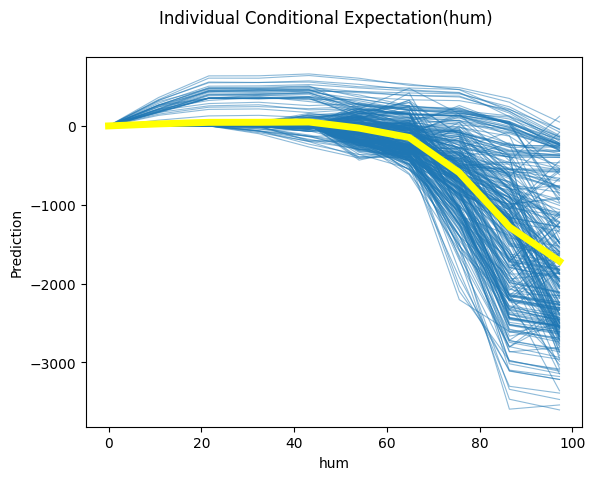

In [206]:
# sampleで取得したインデックスをそのまま使用
ice.individual_conditional_expectation(
    var_name="hum",
    ids_to_compute=[i for i in range(X_sampled.shape[0])],
    n_grid=10,
)  # 例として5つのインスタンスを選択
ice.plot_cice()

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/python/notebook/../../python/src/utils.py:188: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


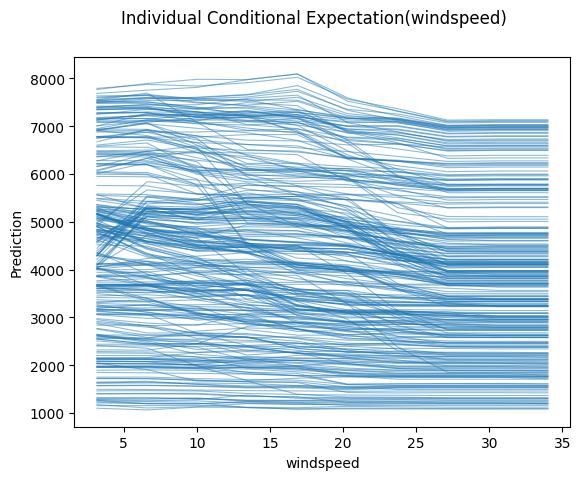

In [189]:
# sampleで取得したインデックスをそのまま使用
ice.individual_conditional_expectation(
    var_name="windspeed",
    ids_to_compute=[i for i in range(X_sampled.shape[0])],
    n_grid=10,
)  # 例として5つのインスタンスを選択
ice.plot()

/Users/shim-kojio/Documents/ramble/Interpretable_machine_learning_by_python/python/notebook/../../python/src/utils.py:257: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


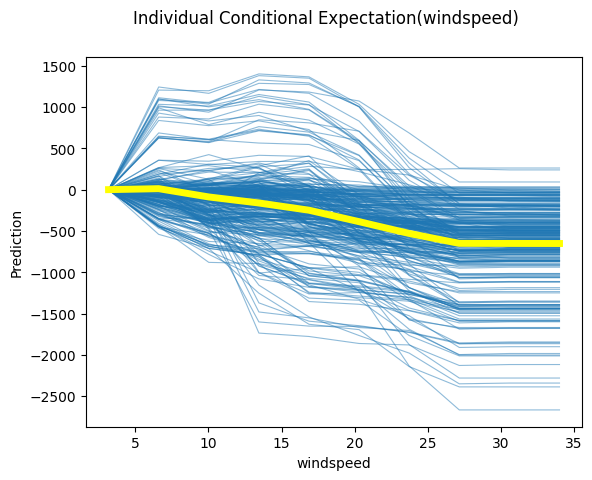

In [207]:
# sampleで取得したインデックスをそのまま使用
ice.individual_conditional_expectation(
    var_name="windspeed",
    ids_to_compute=[i for i in range(X_sampled.shape[0])],
    n_grid=10,
)  # 例として5つのインスタンスを選択
ice.plot_cice()